# Running the model locally

Before running the following cells, make sure that you've already downloaded the pretrained models inside ```../pretrained_models/```

In [37]:
%config Completer.use_jedi=False

%reload_ext autoreload
%autoreload 2

In [38]:
import sys
sys.path.append("../")
from io import BytesIO

In [39]:
import base64
import requests
import torch
import os
import numpy as np
import argparse
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils as vutils
from network.Transformer import Transformer

from tqdm.notebook import tqdm
from test_from_code import transform

In [40]:
styles = ["Hosoda", "Hayao", "Shinkai", "Paprika"]

models = {}

for style in tqdm(styles):
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join("./pretrained_models", style + '_net_G_float.pth')))
    model.eval()
    models[style] = model

  0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
### change this path to test one of the four models locally
path = "../../test-images/paris.jpg"

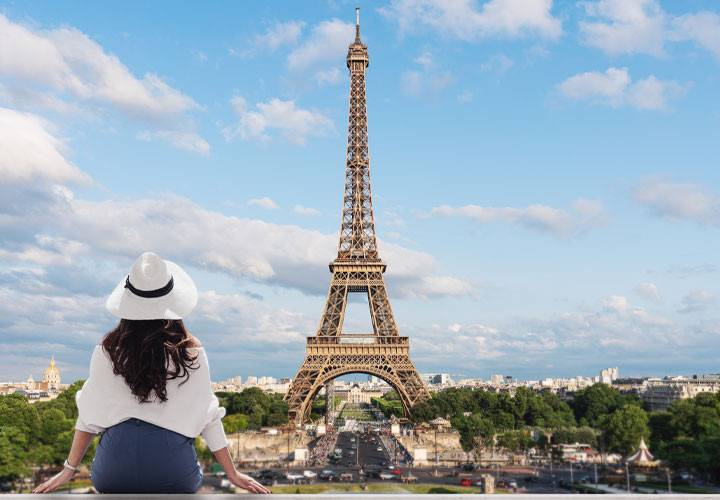

In [42]:
img = Image.open(path)
img

In [43]:
### pick a style in : ["Hosoda", "Hayao", "Shinkai", "Paprika"]
style = "Shinkai"

In [44]:
### choose a load_size, the higher the better are the results, but the longer is the transformation
load_size = 300

In [45]:
%%time
output300 = transform(models, style, path, load_size)

input shape torch.Size([1, 3, 208, 300])
inference time took 1.0069537162780762 s
CPU times: total: 3.88 s
Wall time: 1.02 s


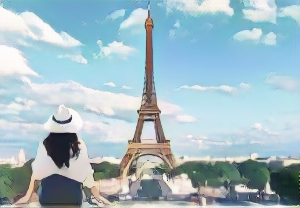

In [46]:
output300

In [47]:
%%time
### load_size to 450
output450 = transform(models, style, path, load_size=450)

input shape torch.Size([1, 3, 312, 450])
inference time took 2.673949718475342 s
CPU times: total: 8.69 s
Wall time: 2.69 s


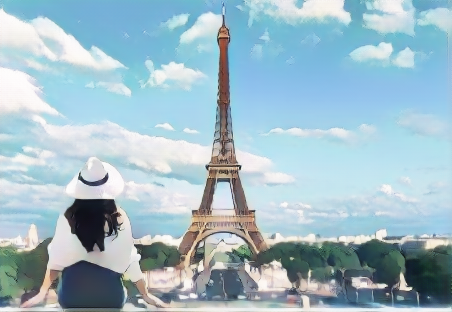

In [48]:
output450

In [49]:
%%time
### load_size to 650
output650 = transform(models, style, path, load_size=650)

input shape torch.Size([1, 3, 451, 650])
inference time took 4.8308799266815186 s
CPU times: total: 17.7 s
Wall time: 4.85 s


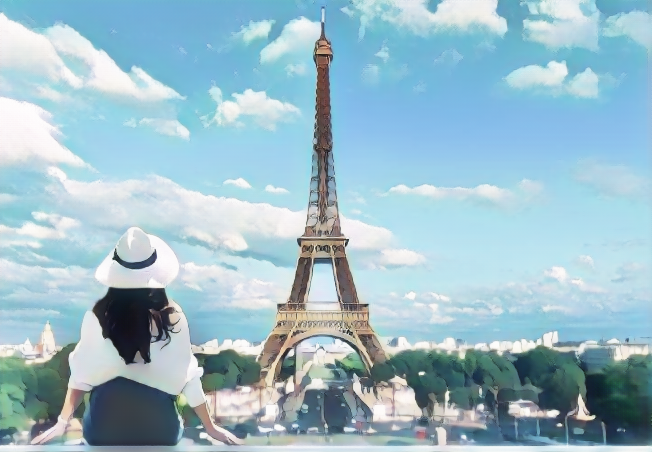

In [50]:
output650

In this section, you'll have to put in your API URL

In [51]:
path = '../../test-images/paris.jpg'

#path = "/Users/ahmedbesbes/Downloads/peinture.JPG"

img = Image.open(path)
with open(path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

url = "https://tbuxfdm545.execute-api.eu-west-3.amazonaws.com/dev/transform"

data = {
    "image": encoded_string,
    "model_id": 1,
    "load_size": 500
}

## Use the deployed API

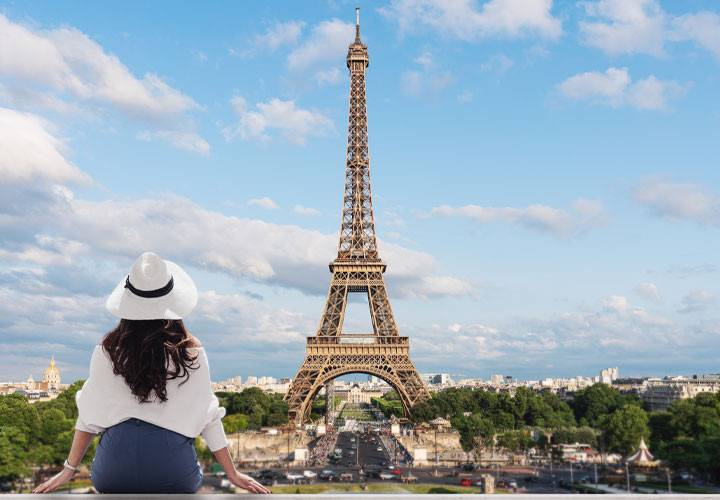

In [52]:
img

In [53]:
%%time
response = requests.post(url, json=data)

ConnectionError: HTTPSConnectionPool(host='tbuxfdm545.execute-api.eu-west-3.amazonaws.com', port=443): Max retries exceeded with url: /dev/transform (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000216A63FA9D0>: Failed to resolve 'tbuxfdm545.execute-api.eu-west-3.amazonaws.com' ([Errno 11001] getaddrinfo failed)"))

In [54]:
image = response.json()["output"]

image = image[image.find(",")+1:]
dec = base64.b64decode(image + "===")

image = Image.open(BytesIO(dec))

KeyError: 'output'

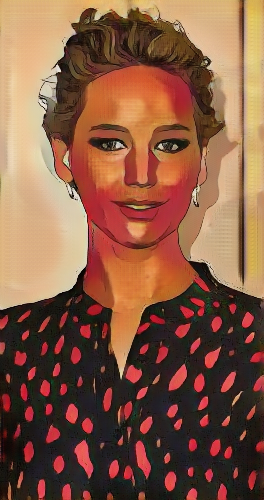

In [ ]:
image